In [9]:
from PIL import Image

# Load the necessary script
%run '../src/EigenSpace.py'
%run '../src/EigenCrossValidation.py'
%run '../src/EigenSplitValidation.py'

In [10]:
# Criar uma lista onde cada element possui um url e um tag, associada a imagem
imagesWithTags = [ {"img":getImageByUrl('../images/att/s{pasta}/{fig}.pgm'.format(pasta=pasta,fig=fig)),"tag":pasta}  for pasta in range(1,41) for fig in range(1,11) ]

# Criar eigenSpace com as imagens acima.
eSpace = EigenSpace(imagesWithTags)


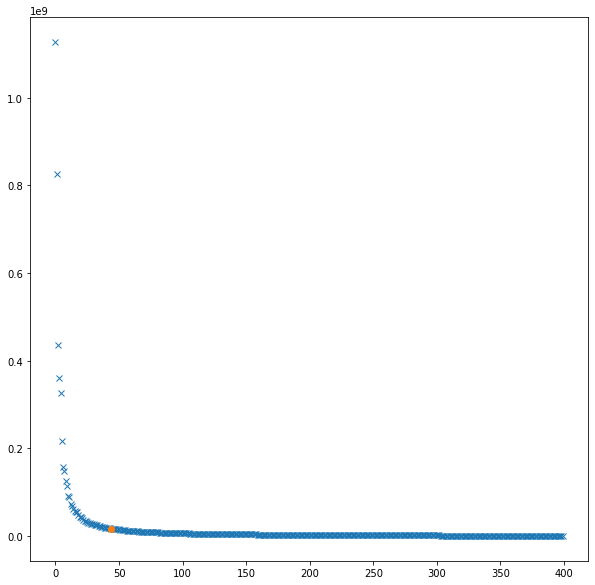

In [11]:
# Criar uma tabela com os valores proprios
eSpace.plotEigenValues()

[None, None, None]

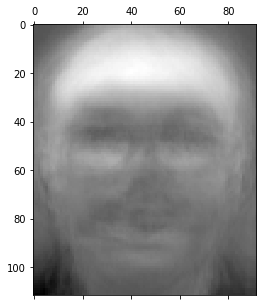

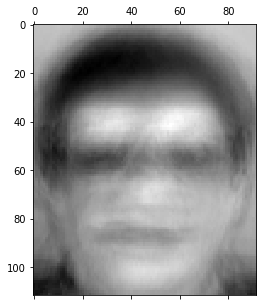

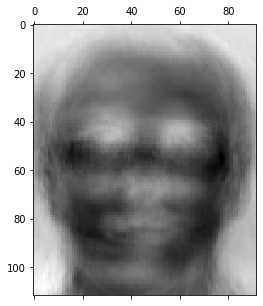

In [12]:
# Mostra as primeiras 3 eigen faces
[ eSpace.plotEigenFace(i) for i in range(0,3) ]

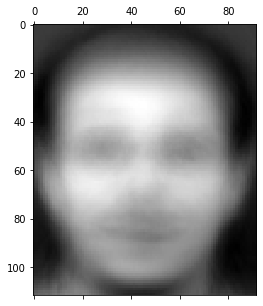

In [13]:
# Para visualizar a cara media podemos utilizar o comando
eSpace.plotAverageFace()

In [14]:
# Fazer uma previsao sobre uma nova cada pode ser feito da seguinte forma.
# 1) Ler a imgem que se pretende prever
testImage = Image.open(f'../images/att/individuo.pgm').convert('L')
testImageData = testImage.getdata()

# 2) Utilizar o metodo predictFace
eSpace.predictFace(testImageData)

(1, 2720.3321891932883)

Text(0.5, 1.0, '2º Exemplo')

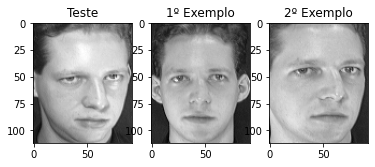

In [15]:
# O resultado obtido é exatamente igual ao por nos obtido. O algoritmo identificou o sujeito como sendo
# o sujeito identificado pela tag "1". O que corresponde a verdade
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
plt.imshow(testImage, cmap='gray')
ax.set_title('Teste')
ax = fig.add_subplot(1, 3, 2)
plt.imshow(Image.open(f'../images/att/s1/1.pgm').convert('L'), cmap='gray')
ax.set_title('1º Exemplo')
ax = fig.add_subplot(1, 3, 3)
plt.imshow(Image.open(f'../images/att/s1/2.pgm').convert('L'), cmap='gray')
ax.set_title('2º Exemplo')

In [16]:
EigenSplitValidation(imagesWithTags,0.7).accuracy()

0.9416666666666667

In [19]:
EigenCrossValidation(imagesWithTags,10).accuracy()

0.9799999999999999

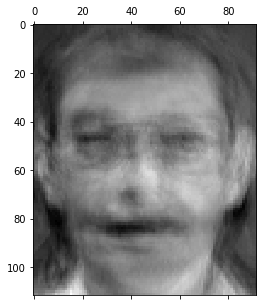

In [18]:
testImage = Image.open(f'../images/att/occluded_mouth.pgm').convert('L')
testImageData = testImage.getdata()
plt.matshow(eSpace.projectFace(testImageData), cmap="gray")